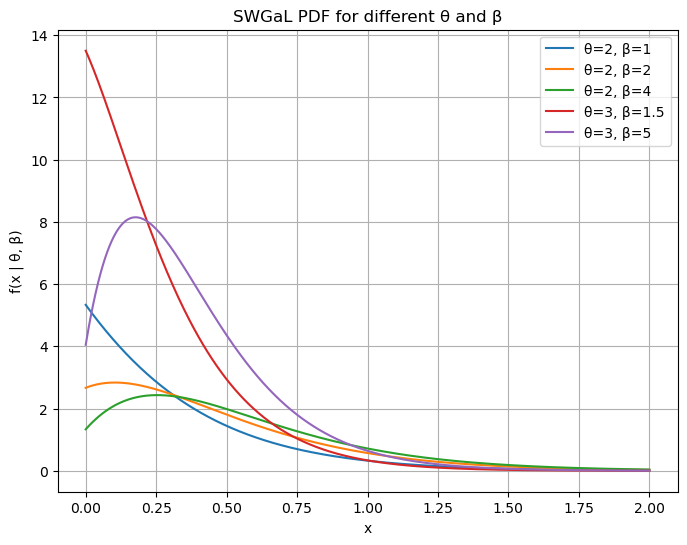

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define phi(θ, β) - you may need the exact expression from your source
def phi(theta, beta):
    # Placeholder: set phi(θ, β) = 1 if not defined
    return 1  

# PDF function
def f_swgal(x, theta, beta):
    numerator = (theta**4 *
                 ((beta + beta*theta - theta)*(theta*x + 1) + theta) *
                 ((beta + beta*theta - theta)*x + 1) *
                 np.exp(-2*theta*x))
    denominator = phi(theta, beta) * (beta**2) * ((1+theta)**2)
    return numerator / denominator

# Plot for different parameter values
x = np.linspace(0, 2, 500)

params = [
    (2, 1),
    (2, 2),
    (2, 4),
    (3, 1.5),
    (3, 5)
]

plt.figure(figsize=(8,6))

for theta, beta in params:
    plt.plot(x, f_swgal(x, theta, beta), label=f"θ={theta}, β={beta}")

plt.title("SWGaL PDF for different θ and β")
plt.xlabel("x")
plt.ylabel("f(x | θ, β)")
plt.legend()
plt.grid(True)
plt.show()


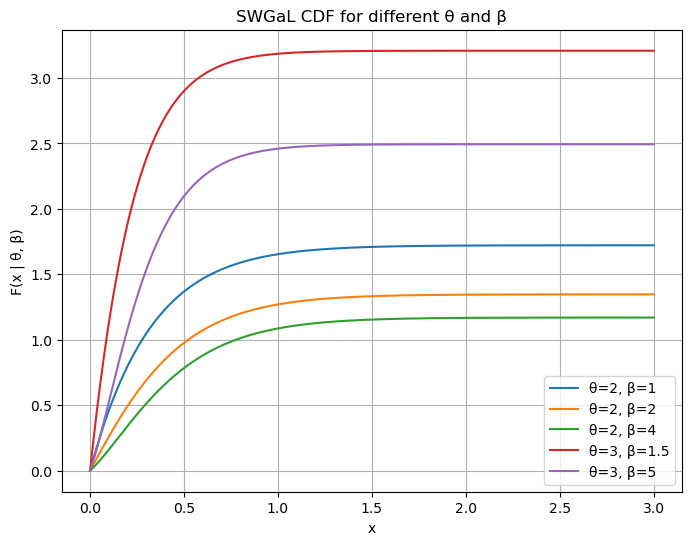

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammainc, gamma

# Define phi(θ, β) - placeholder again
def phi(theta, beta):
    # Placeholder: replace with correct formula from the paper
    return 1  

# Phi(θ, β)
def Phi(theta, beta):
    return theta**4 / (phi(theta, beta) * (beta**2) * (1 + theta)**2)

# Lower incomplete gamma γ(s, z)
def lower_incomplete_gamma(s, z):
    return gammainc(s, z) * gamma(s)

# CDF
def F_swgal(x, theta, beta):
    A = (beta + beta*theta - theta)
    term1 = lower_incomplete_gamma(3, 2*theta*x) / (2*theta)**3
    term2 = (2*A + A**2) * lower_incomplete_gamma(2, 2*theta*x) / (2*theta)**2
    term3 = beta * (1 + theta) * (1 - np.exp(-2*theta*x)) / (2*theta)
    return Phi(theta, beta) * (term1 + term2 + term3)

# X range
x = np.linspace(0, 3, 500)

# Parameter sets for plotting
params = [
    (2, 1),
    (2, 2),
    (2, 4),
    (3, 1.5),
    (3, 5)
]

plt.figure(figsize=(8,6))

for theta, beta in params:
    plt.plot(x, F_swgal(x, theta, beta), label=f"θ={theta}, β={beta}")

plt.title("SWGaL CDF for different θ and β")
plt.xlabel("x")
plt.ylabel("F(x | θ, β)")
plt.legend()
plt.grid(True)
plt.show()


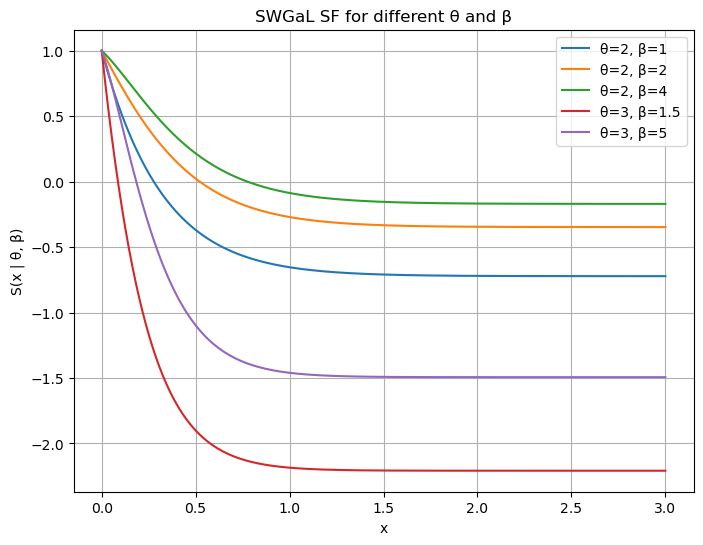

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammainc, gamma

# Define phi(θ, β) - placeholder again
def phi(theta, beta):
    # Placeholder: replace with correct formula from the paper
    return 1  

# Phi(θ, β)
def Phi(theta, beta):
    return theta**4 / (phi(theta, beta) * (beta**2) * (1 + theta)**2)

# Lower incomplete gamma γ(s, z)
def lower_incomplete_gamma(s, z):
    return gammainc(s, z) * gamma(s)

# SF
def S_swgal(x, theta, beta):
    A = (beta + beta*theta - theta)
    term1 = lower_incomplete_gamma(3, 2*theta*x) / (2*theta)**3
    term2 = (2*A + A**2) * lower_incomplete_gamma(2, 2*theta*x) / (2*theta)**2
    term3 = beta * (1 + theta) * (1 - np.exp(-2*theta*x)) / (2*theta)
    return 1-Phi(theta, beta) * (term1 + term2 + term3)

# X range
x = np.linspace(0, 3, 500)

# Parameter sets for plotting
params = [
    (2, 1),
    (2, 2),
    (2, 4),
    (3, 1.5),
    (3, 5)
]

plt.figure(figsize=(8,6))

for theta, beta in params:
    plt.plot(x, S_swgal(x, theta, beta), label=f"θ={theta}, β={beta}")

plt.title("SWGaL SF for different θ and β")
plt.xlabel("x")
plt.ylabel("S(x | θ, β)")
plt.legend()
plt.grid(True)
plt.show()


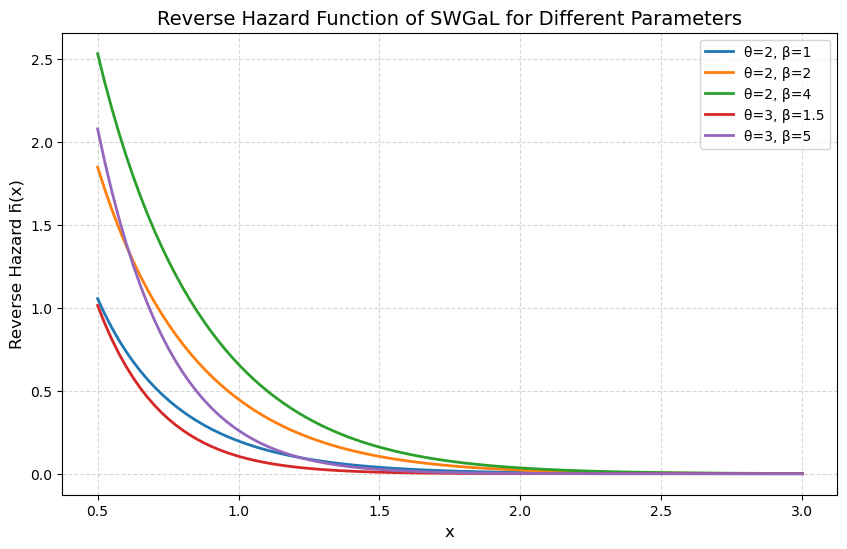

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammainc, gamma

# Reverse Hazard Function
def reverse_hazard(x, theta, beta):
    A = beta + beta*theta - theta
    
    # Numerator (PDF part)
    num = ((A*(theta*x + 1) + theta) * (A*x + 1) * np.exp(-2*theta*x))
    
    # Denominator (CDF part)
    term1 = gammainc(3, 2*theta*x) * gamma(3) / (2*theta)**3
    term2 = (2*A + A**2) * (gammainc(2, 2*theta*x) * gamma(2)) / (2*theta)**2
    term3 = beta*(1+theta) * (1 - np.exp(-2*theta*x)) / (2*theta)
    den = term1 + term2 + term3
    
    return num / den

# x values
x = np.linspace(0.5, 3, 100)

# Different parameter combinations (theta, beta)
params = [
    (2, 1),
    (2, 2),
    (2, 4),
    (3, 1.5),
    (3, 5)
]

# Plot
plt.figure(figsize=(10,6))

for theta, beta in params:
    rh_values = reverse_hazard(x, theta, beta)
    plt.plot(x, rh_values, label=f"θ={theta}, β={beta}", linewidth=2)

plt.title("Reverse Hazard Function of SWGaL for Different Parameters", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("Reverse Hazard h̄(x)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


SWGaL Distribution Moments and Variance (θ = 1.5)
Beta   E[X]         E[X²]        E[X³]        E[X⁴]        Variance    
--------------------------------------------------------------------------------
1      0.569231     0.523077     0.687179     1.162393     0.199053    
2      0.915294     0.983529     1.433725     2.614379     0.145766    
3      1.096552     1.227586     1.834483     3.402299     0.025161    
4      1.207509     1.377474     2.081456     3.889268     0.000000    
5      1.282353     1.478733     2.248567     4.219206     0.000000    
6      1.336232     1.551691     2.369082     4.457327     0.000000    
7      1.376867     1.606747     2.460080     4.637216     0.000000    
8      1.408606     1.649766     2.531213     4.777882     0.000000    
9      1.434081     1.684305     2.588341     4.890882     0.000000    
10     1.454979     1.712645     2.635227     4.983642     0.000000    


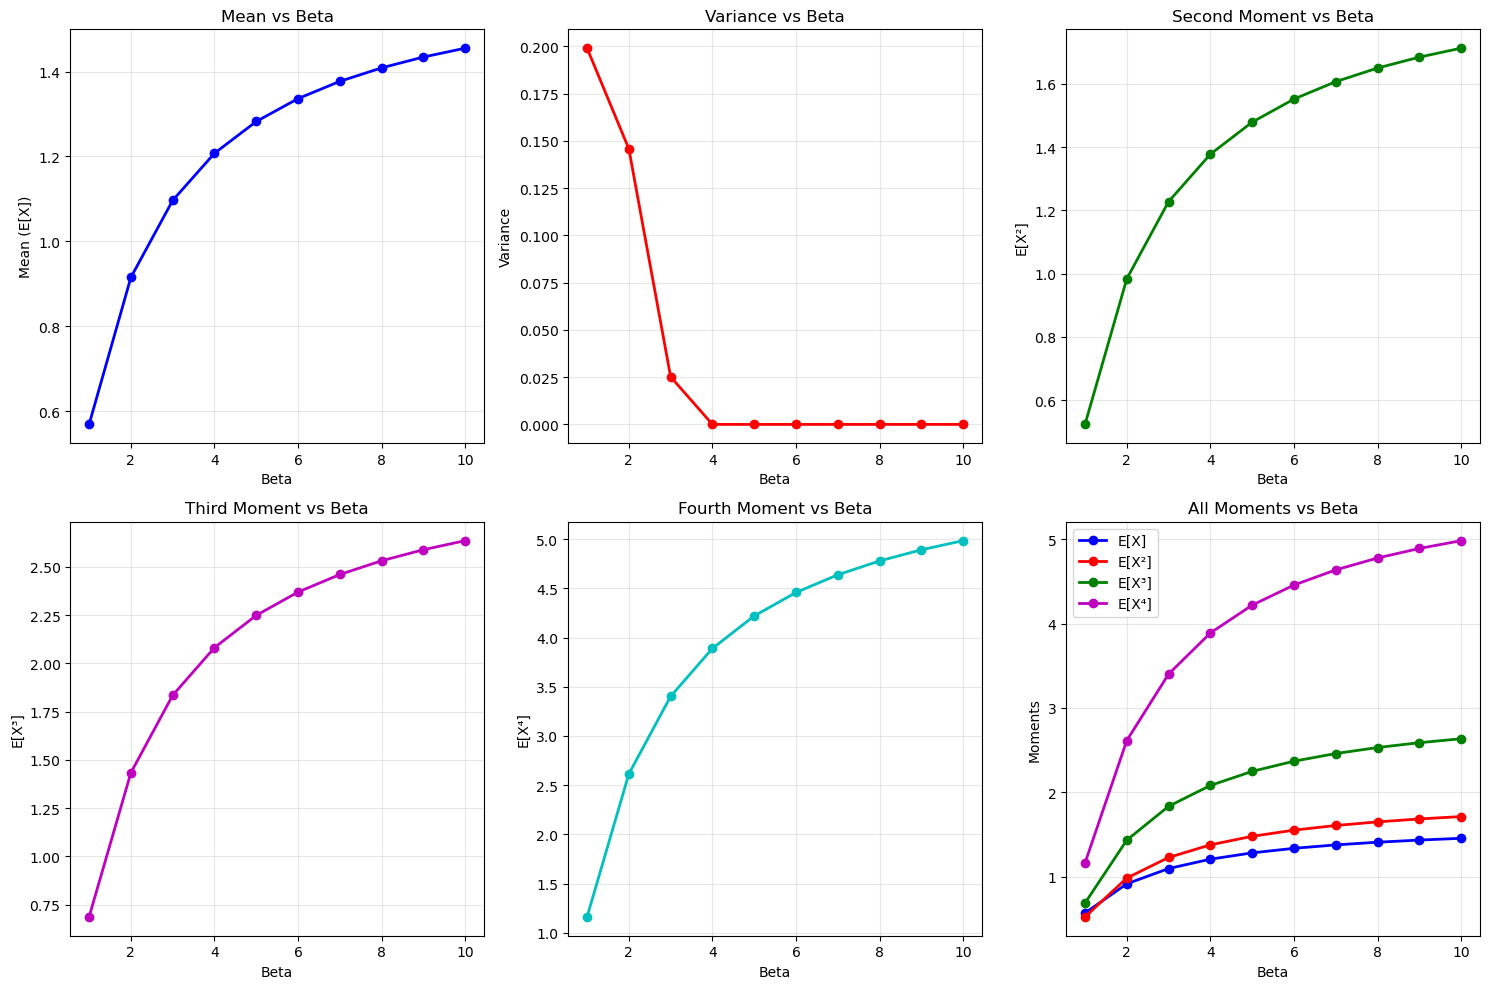


Additional Statistics
Beta   Mean       Variance   Std Dev    CV        
--------------------------------------------------
1      0.569231   0.199053   0.446154   0.783784  
2      0.915294   0.145766   0.381793   0.417126  
3      1.096552   0.025161   0.158621   0.144654  
4      1.207509   0.000000   0.000000   0.000000  
5      1.282353   0.000000   0.000000   0.000000  
6      1.336232   0.000000   0.000000   0.000000  
7      1.376867   0.000000   0.000000   0.000000  
8      1.408606   0.000000   0.000000   0.000000  
9      1.434081   0.000000   0.000000   0.000000  
10     1.454979   0.000000   0.000000   0.000000  


In [5]:
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt

def SWGaL_moments(theta, beta, k_max=4):
    """
    Calculate moments for the Survival Weighted Gamma Lindley (SWGaL) distribution.

    Parameters:
    - theta: scale parameter > 0
    - beta: shape parameter > 0
    - k_max: maximum moment order to compute

    Returns:
    - moments: list of moments E[X^k] for k = 1..k_max
    - variance: variance of the distribution
    """
    A = beta + beta * theta - theta
    B = A * (beta + beta * theta + theta)
    C = beta + beta * theta

    # Compute normalization constant phi(theta, beta)
    term1 = (A) / ((2 * theta) ** 3)
    term2 = (2 * A + A ** 2) / ((2 * theta) ** 2)
    term3 = (beta * (1 + theta)) / (2 * theta)
    phi_val = (theta ** 4) / (beta ** 2 * (1 + theta) ** 2) * (term1 + term2 + term3)

    # Compute Phi(theta, beta)
    Phi_val = (theta ** 4) / (phi_val * beta ** 2 * (1 + theta) ** 2)

    moments = []
    for k in range(1, k_max + 1):
        moment_k = Phi_val * (
            A ** 2 * theta * gamma(k + 3) / ((2 * theta) ** (k + 3)) +
            B * gamma(k + 2) / ((2 * theta) ** (k + 2)) +
            C * gamma(k + 1) / ((2 * theta) ** (k + 1))
        )
        moments.append(moment_k)

    # Variance = E[X^2] - (E[X])^2
    variance = moments[1] - moments[0] ** 2

    # Ensure variance is non-negative (numerical stability)
    variance = max(variance, 0.0)

    return moments, variance

# Set constant theta value
theta = 1.5  # You can change this value

# Calculate moments for beta from 1 to 10
beta_values = list(range(1, 11))
results = []

print(f"SWGaL Distribution Moments and Variance (θ = {theta})")
print("=" * 80)
print(f"{'Beta':<6} {'E[X]':<12} {'E[X²]':<12} {'E[X³]':<12} {'E[X⁴]':<12} {'Variance':<12}")
print("-" * 80)

for beta in beta_values:
    moments, variance = SWGaL_moments(theta, beta)
    results.append({
        'beta': beta,
        'moments': moments,
        'variance': variance
    })
    
    print(f"{beta:<6} {moments[0]:<12.6f} {moments[1]:<12.6f} {moments[2]:<12.6f} {moments[3]:<12.6f} {variance:<12.6f}")

# Plotting the results
plt.figure(figsize=(15, 10))

# Plot 1: Mean (E[X]) vs Beta
plt.subplot(2, 3, 1)
means = [r['moments'][0] for r in results]
plt.plot(beta_values, means, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Beta')
plt.ylabel('Mean (E[X])')
plt.title('Mean vs Beta')
plt.grid(True, alpha=0.3)

# Plot 2: Variance vs Beta
plt.subplot(2, 3, 2)
variances = [r['variance'] for r in results]
plt.plot(beta_values, variances, 'ro-', linewidth=2, markersize=6)
plt.xlabel('Beta')
plt.ylabel('Variance')
plt.title('Variance vs Beta')
plt.grid(True, alpha=0.3)

# Plot 3: Second Moment (E[X²]) vs Beta
plt.subplot(2, 3, 3)
second_moments = [r['moments'][1] for r in results]
plt.plot(beta_values, second_moments, 'go-', linewidth=2, markersize=6)
plt.xlabel('Beta')
plt.ylabel('E[X²]')
plt.title('Second Moment vs Beta')
plt.grid(True, alpha=0.3)

# Plot 4: Third Moment (E[X³]) vs Beta
plt.subplot(2, 3, 4)
third_moments = [r['moments'][2] for r in results]
plt.plot(beta_values, third_moments, 'mo-', linewidth=2, markersize=6)
plt.xlabel('Beta')
plt.ylabel('E[X³]')
plt.title('Third Moment vs Beta')
plt.grid(True, alpha=0.3)

# Plot 5: Fourth Moment (E[X⁴]) vs Beta
plt.subplot(2, 3, 5)
fourth_moments = [r['moments'][3] for r in results]
plt.plot(beta_values, fourth_moments, 'co-', linewidth=2, markersize=6)
plt.xlabel('Beta')
plt.ylabel('E[X⁴]')
plt.title('Fourth Moment vs Beta')
plt.grid(True, alpha=0.3)

# Plot 6: All moments together
plt.subplot(2, 3, 6)
plt.plot(beta_values, means, 'bo-', label='E[X]', linewidth=2)
plt.plot(beta_values, second_moments, 'ro-', label='E[X²]', linewidth=2)
plt.plot(beta_values, third_moments, 'go-', label='E[X³]', linewidth=2)
plt.plot(beta_values, fourth_moments, 'mo-', label='E[X⁴]', linewidth=2)
plt.xlabel('Beta')
plt.ylabel('Moments')
plt.title('All Moments vs Beta')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional analysis: Coefficient of Variation
print("\n" + "=" * 50)
print("Additional Statistics")
print("=" * 50)
print(f"{'Beta':<6} {'Mean':<10} {'Variance':<10} {'Std Dev':<10} {'CV':<10}")
print("-" * 50)

for r in results:
    mean = r['moments'][0]
    variance = r['variance']
    std_dev = np.sqrt(variance)
    cv = std_dev / mean if mean > 0 else 0
    
    print(f"{r['beta']:<6} {mean:<10.6f} {variance:<10.6f} {std_dev:<10.6f} {cv:<10.6f}")

SWGaL Distribution Moments and Variance (β = 2.0)
Theta   E[X]         E[X²]        E[X³]        E[X⁴]        Variance    
--------------------------------------------------------------------------------
1       1.326531     2.183673     4.836735     13.346939    0.423990    
2       0.693878     0.551020     0.596939     0.811224     0.069554    
3       0.463221     0.240557     0.171637     0.154186     0.025983    
4       0.345631     0.133010     0.070631     0.047330     0.013549    
5       0.274905     0.083941     0.035471     0.018944     0.008369    
6       0.227882     0.057641     0.020219     0.008974     0.005711    
7       0.194438     0.041965     0.012580     0.004776     0.004159    
8       0.169471     0.031890     0.008345     0.002767     0.003170    
9       0.150138     0.025041     0.005814     0.001711     0.002500    
10      0.134735     0.020177     0.004210     0.001114     0.002024    


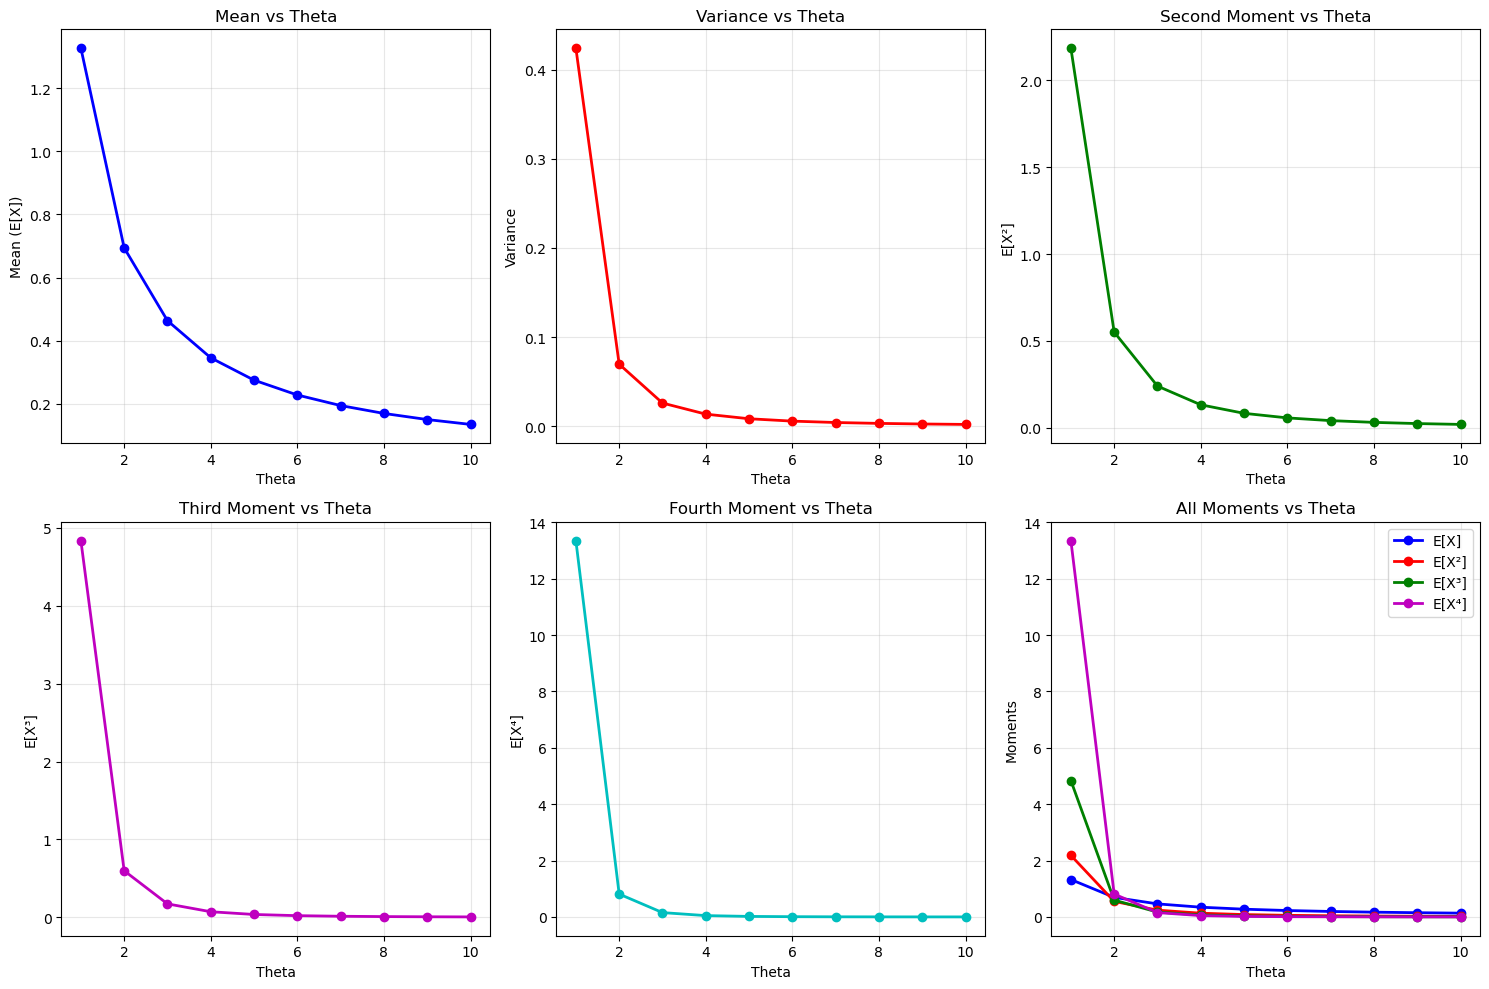


Additional Statistics
Theta   Mean       Variance   Std Dev    CV         Skewness  
----------------------------------------------------------------------
1       1.326531   0.423990   0.651145   0.490863   2.952609  
2       0.693878   0.069554   0.263732   0.380084   6.436750  
3       0.463221   0.025983   0.161193   0.347984   8.627324  
4       0.345631   0.013549   0.116400   0.336774   9.696984  
5       0.274905   0.008369   0.091480   0.332770   10.180673 
6       0.227882   0.005711   0.075568   0.331610   10.383903 
7       0.194438   0.004159   0.064487   0.331660   10.452875 
8       0.169471   0.003170   0.056304   0.332234   10.456771 
9       0.150138   0.002500   0.050000   0.333026   10.429201 
10      0.134735   0.002024   0.044987   0.333890   10.387010 

Trend Analysis
Mean trend as theta increases: decreasing
Variance trend as theta increases: decreasing
Theta with minimum variance: 10 (variance = 0.002024)
Theta with maximum variance: 1 (variance = 0.423990)

P

In [6]:
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt

def SWGaL_moments(theta, beta, k_max=4):
    """
    Calculate moments for the Survival Weighted Gamma Lindley (SWGaL) distribution.

    Parameters:
    - theta: scale parameter > 0
    - beta: shape parameter > 0
    - k_max: maximum moment order to compute

    Returns:
    - moments: list of moments E[X^k] for k = 1..k_max
    - variance: variance of the distribution
    """
    A = beta + beta * theta - theta
    B = A * (beta + beta * theta + theta)
    C = beta + beta * theta

    # Compute normalization constant phi(theta, beta)
    term1 = (A) / ((2 * theta) ** 3)
    term2 = (2 * A + A ** 2) / ((2 * theta) ** 2)
    term3 = (beta * (1 + theta)) / (2 * theta)
    phi_val = (theta ** 4) / (beta ** 2 * (1 + theta) ** 2) * (term1 + term2 + term3)

    # Compute Phi(theta, beta)
    Phi_val = (theta ** 4) / (phi_val * beta ** 2 * (1 + theta) ** 2)

    moments = []
    for k in range(1, k_max + 1):
        moment_k = Phi_val * (
            A ** 2 * theta * gamma(k + 3) / ((2 * theta) ** (k + 3)) +
            B * gamma(k + 2) / ((2 * theta) ** (k + 2)) +
            C * gamma(k + 1) / ((2 * theta) ** (k + 1))
        )
        moments.append(moment_k)

    # Variance = E[X^2] - (E[X])^2
    variance = moments[1] - moments[0] ** 2

    # Ensure variance is non-negative (numerical stability)
    variance = max(variance, 0.0)

    return moments, variance

# Set constant beta value
beta = 2.0  # You can change this value

# Calculate moments for theta from 1 to 10
theta_values = list(range(1, 11))
results = []

print(f"SWGaL Distribution Moments and Variance (β = {beta})")
print("=" * 80)
print(f"{'Theta':<7} {'E[X]':<12} {'E[X²]':<12} {'E[X³]':<12} {'E[X⁴]':<12} {'Variance':<12}")
print("-" * 80)

for theta in theta_values:
    moments, variance = SWGaL_moments(theta, beta)
    results.append({
        'theta': theta,
        'moments': moments,
        'variance': variance
    })
    
    print(f"{theta:<7} {moments[0]:<12.6f} {moments[1]:<12.6f} {moments[2]:<12.6f} {moments[3]:<12.6f} {variance:<12.6f}")

# Plotting the results
plt.figure(figsize=(15, 10))

# Plot 1: Mean (E[X]) vs Theta
plt.subplot(2, 3, 1)
means = [r['moments'][0] for r in results]
plt.plot(theta_values, means, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Theta')
plt.ylabel('Mean (E[X])')
plt.title('Mean vs Theta')
plt.grid(True, alpha=0.3)

# Plot 2: Variance vs Theta
plt.subplot(2, 3, 2)
variances = [r['variance'] for r in results]
plt.plot(theta_values, variances, 'ro-', linewidth=2, markersize=6)
plt.xlabel('Theta')
plt.ylabel('Variance')
plt.title('Variance vs Theta')
plt.grid(True, alpha=0.3)

# Plot 3: Second Moment (E[X²]) vs Theta
plt.subplot(2, 3, 3)
second_moments = [r['moments'][1] for r in results]
plt.plot(theta_values, second_moments, 'go-', linewidth=2, markersize=6)
plt.xlabel('Theta')
plt.ylabel('E[X²]')
plt.title('Second Moment vs Theta')
plt.grid(True, alpha=0.3)

# Plot 4: Third Moment (E[X³]) vs Theta
plt.subplot(2, 3, 4)
third_moments = [r['moments'][2] for r in results]
plt.plot(theta_values, third_moments, 'mo-', linewidth=2, markersize=6)
plt.xlabel('Theta')
plt.ylabel('E[X³]')
plt.title('Third Moment vs Theta')
plt.grid(True, alpha=0.3)

# Plot 5: Fourth Moment (E[X⁴]) vs Theta
plt.subplot(2, 3, 5)
fourth_moments = [r['moments'][3] for r in results]
plt.plot(theta_values, fourth_moments, 'co-', linewidth=2, markersize=6)
plt.xlabel('Theta')
plt.ylabel('E[X⁴]')
plt.title('Fourth Moment vs Theta')
plt.grid(True, alpha=0.3)

# Plot 6: All moments together
plt.subplot(2, 3, 6)
plt.plot(theta_values, means, 'bo-', label='E[X]', linewidth=2)
plt.plot(theta_values, second_moments, 'ro-', label='E[X²]', linewidth=2)
plt.plot(theta_values, third_moments, 'go-', label='E[X³]', linewidth=2)
plt.plot(theta_values, fourth_moments, 'mo-', label='E[X⁴]', linewidth=2)
plt.xlabel('Theta')
plt.ylabel('Moments')
plt.title('All Moments vs Theta')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional analysis: Coefficient of Variation and Skewness
print("\n" + "=" * 70)
print("Additional Statistics")
print("=" * 70)
print(f"{'Theta':<7} {'Mean':<10} {'Variance':<10} {'Std Dev':<10} {'CV':<10} {'Skewness':<10}")
print("-" * 70)

for r in results:
    mean = r['moments'][0]
    variance = r['variance']
    std_dev = np.sqrt(variance)
    cv = std_dev / mean if mean > 0 else 0
    # Skewness = E[X³] - 3*mean*variance - mean³ / std_dev³
    skewness_numerator = r['moments'][2] - 3 * mean * variance - mean**3
    skewness = skewness_numerator / (std_dev**3) if std_dev > 0 else 0
    
    print(f"{r['theta']:<7} {mean:<10.6f} {variance:<10.6f} {std_dev:<10.6f} {cv:<10.6f} {skewness:<10.6f}")

# Analysis of moment behavior
print("\n" + "=" * 50)
print("Trend Analysis")
print("=" * 50)

# Check if moments are generally increasing or decreasing
mean_trend = "decreasing" if means[-1] < means[0] else "increasing"
variance_trend = "decreasing" if variances[-1] < variances[0] else "increasing"

print(f"Mean trend as theta increases: {mean_trend}")
print(f"Variance trend as theta increases: {variance_trend}")

# Find theta with minimum and maximum variance
min_var_idx = np.argmin(variances)
max_var_idx = np.argmax(variances)

print(f"Theta with minimum variance: {theta_values[min_var_idx]} (variance = {variances[min_var_idx]:.6f})")
print(f"Theta with maximum variance: {theta_values[max_var_idx]} (variance = {variances[max_var_idx]:.6f})")

# Create a summary table of percentage changes
print("\n" + "=" * 60)
print("Percentage Change from Theta=1 to Theta=10")
print("=" * 60)

theta_1_results = results[0]  # theta = 1
theta_10_results = results[-1]  # theta = 10

pct_change_mean = ((theta_10_results['moments'][0] - theta_1_results['moments'][0]) / theta_1_results['moments'][0]) * 100
pct_change_variance = ((theta_10_results['variance'] - theta_1_results['variance']) / theta_1_results['variance']) * 100

print(f"Mean: {theta_1_results['moments'][0]:.6f} → {theta_10_results['moments'][0]:.6f} ({pct_change_mean:+.2f}%)")
print(f"Variance: {theta_1_results['variance']:.6f} → {theta_10_results['variance']:.6f} ({pct_change_variance:+.2f}%)")

In [12]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.special import gamma, gammainc
from scipy.stats import kstest
import warnings
warnings.filterwarnings('ignore')

class SWGaLDistribution:
    """
    Survival Weighted Gamma Lindley Distribution
    """
    
    def __init__(self):
        self.data = None
        self.params = None
        
    def phi_function(self, theta, beta):
        """Calculate phi(theta, beta) normalization constant"""
        A = beta + beta * theta - theta
        term1 = A / ((2 * theta) ** 3)
        term2 = (2 * A + A ** 2) / ((2 * theta) ** 2)
        term3 = beta * (1 + theta) / (2 * theta)
        
        phi_val = (theta ** 4) / (beta ** 2 * (1 + theta) ** 2) * (term1 + term2 + term3)
        return phi_val
    
    def pdf(self, x, theta, beta):
        """Probability Density Function"""
        if theta <= 0 or beta <= 0:
            return -np.inf
            
        A = beta + beta * theta - theta
        phi_val = self.phi_function(theta, beta)
        
        term1 = (A * (theta * x + 1) + theta)
        term2 = (A * x + 1)
        numerator = (theta ** 4) * term1 * term2 * np.exp(-2 * theta * x)
        denominator = phi_val * (beta ** 2) * ((1 + theta) ** 2)
        
        return numerator / denominator
    
    def cdf(self, x, theta, beta):
        """Cumulative Distribution Function"""
        if theta <= 0 or beta <= 0:
            return -np.inf
            
        A = beta + beta * theta - theta
        phi_val = self.phi_function(theta, beta)
        Phi = (theta ** 4) / (phi_val * beta ** 2 * (1 + theta) ** 2)
        
        # Incomplete gamma functions
        gamma3 = gammainc(3, 2 * theta * x) * gamma(3)
        gamma2 = gammainc(2, 2 * theta * x) * gamma(2)
        
        term1 = gamma3 / ((2 * theta) ** 3)
        term2 = (2 * A + A ** 2) * gamma2 / ((2 * theta) ** 2)
        term3 = beta * (1 + theta) * (1 - np.exp(-2 * theta * x)) / (2 * theta)
        
        return Phi * (term1 + term2 + term3)
    
    def log_likelihood(self, params, data):
        """Negative log-likelihood for minimization"""
        theta, beta = params
        n = len(data)
        
        if theta <= 0 or beta <= 0:
            return 1e10
            
        log_lik = 0
        for x in data:
            pdf_val = self.pdf(x, theta, beta)
            if pdf_val > 0:
                log_lik += np.log(pdf_val)
            else:
                return 1e10
                
        return -log_lik  # Negative for minimization
    
    def fit(self, data, initial_guess=None):
        """
        Fit SWGaL distribution to data using Maximum Likelihood Estimation
        
        Parameters:
        -----------
        data : array-like
            Input data
        initial_guess : tuple, optional
            Initial guess for (theta, beta)
        
        Returns:
        --------
        dict : Fitted parameters and statistics
        """
        self.data = np.array(data)
        
        if initial_guess is None:
            # Reasonable initial guess based on data characteristics
            mean_val = np.mean(data)
            initial_guess = (1.0 / mean_val, 1.0)
        
        # Perform MLE
        result = minimize(self.log_likelihood, initial_guess, 
                         args=(self.data,),
                         method='L-BFGS-B',
                         bounds=[(1e-6, None), (1e-6, None)])
        
        if result.success:
            theta_hat, beta_hat = result.x
            self.params = (theta_hat, beta_hat)
            
            # Calculate various statistics
            n = len(data)
            k = 2  # Number of parameters
            
            # Log-likelihood at optimum
            logL = -result.fun
            
            # Information criteria
            aic = 2 * k - 2 * logL
            bic = k * np.log(n) - 2 * logL
            aicc = aic + (2 * k * (k + 1)) / (n - k - 1)
            hqic = -2 * logL + 2 * k * np.log(np.log(n))
            
            # KS test
            ks_stat, ks_pvalue = kstest(data, self.cdf, args=(theta_hat, beta_hat))
            
            return {
                'parameters': {'theta': theta_hat, 'beta': beta_hat},
                'log_likelihood': logL,
                'AIC': aic,
                'BIC': bic,
                'AICC': aicc,
                'HQIC': hqic,
                'KS_statistic': ks_stat,
                'KS_pvalue': ks_pvalue,
                'convergence': result.success,
                'n_parameters': k,
                'n_observations': n
            }
        else:
            raise ValueError("Optimization failed: " + result.message)

def compare_models(data, distributions):
    """
    Compare multiple distributions using information criteria
    
    Parameters:
    -----------
    data : array-like
        Input data
    distributions : dict
        Dictionary of distribution names and their fit methods
        
    Returns:
    --------
    DataFrame : Comparison results
    """
    results = []
    
    for name, dist_class in distributions.items():
        try:
            dist = dist_class()
            result = dist.fit(data)
            results.append({
                'Distribution': name,
                'theta': result['parameters']['theta'],
                'beta': result['parameters']['beta'],
                'LogLikelihood': result['log_likelihood'],
                'AIC': result['AIC'],
                'BIC': result['BIC'],
                'AICC': result['AICC'],
                'HQIC': result['HQIC'],
                'KS_Statistic': result['KS_statistic'],
                'KS_pvalue': result['KS_pvalue']
            })
        except Exception as e:
            print(f"Error fitting {name}: {e}")
            continue
    
    return pd.DataFrame(results)

# Example usage with the provided datasets
if __name__ == "__main__":
    # Example 1: Wang’s18 data (divided by 10)
    Wangs_data = np.array([5,11,21,31,46,75,98,122,145,
 165,195,224,245,293,321,330,350,])
    
   
    
    print("Fitting SWGaL distribution to Wangs_data:")
    print("=" * 50)
    
    result = swgal.fit( Wangs_data)
    
    print(f"Parameters: theta = {result['parameters']['theta']:.4f}, "
          f"beta = {result['parameters']['beta']:.4f}")
    print(f"Log-Likelihood: {result['log_likelihood']:.4f}")
    print(f"AIC: {result['AIC']:.4f}")
    print(f"BIC: {result['BIC']:.4f}")
    print(f"AICC: {result['AICC']:.4f}")
    print(f"HQIC: {result['HQIC']:.4f}")
    print(f"KS Statistic: {result['KS_statistic']:.4f}")
    print(f"KS p-value: {result['KS_pvalue']:.4f}")
    
  
    # You can add other datasets similarly
  # Example 3: Proschan data
    Proschan = np.array([90,10,60,186,61,49,14,24,56,20,79,84,44,59,29,118,25,156,310,76,26,
 44,23,62,130,208,70,101,208])
 # Fit SWGaL distribution to Proschan data
    swgal = SWGaLDistribution()
    
    print("Fitting SWGaL distribution to Proschan Data:")
    print("=" * 50)
    
    result = swgal.fit(Proschan)
    
    print(f"Parameters: theta = {result['parameters']['theta']:.4f}, "
          f"beta = {result['parameters']['beta']:.4f}")
    print(f"Log-Likelihood: {result['log_likelihood']:.4f}")
    print(f"AIC: {result['AIC']:.4f}")
    print(f"BIC: {result['BIC']:.4f}")
    print(f"AICC: {result['AICC']:.4f}")
    print(f"HQIC: {result['HQIC']:.4f}")
    print(f"KS Statistic: {result['KS_statistic']:.4f}")
    print(f"KS p-value: {result['KS_pvalue']:.4f}")


    

Fitting SWGaL distribution to Wangs_data:
Parameters: theta = 0.0078, beta = 38604.8076
Log-Likelihood: -93.7347
AIC: 191.4693
BIC: 193.1358
AICC: 192.3265
HQIC: 191.6350
KS Statistic: 0.2189
KS p-value: 0.3385
Fitting SWGaL distribution to Proschan Data:
Parameters: theta = 0.0148, beta = 24174.9412
Log-Likelihood: -136.2499
AIC: 276.4997
BIC: 279.2343
AICC: 276.9612
HQIC: 277.3561
KS Statistic: 0.1161
KS p-value: 0.7871


In [10]:


import numpy as np
import pandas as pd
from scipy.special import gammainc
from scipy.optimize import bisect
import math

# --- Define functions from the paper (corrected) ---

def phi(theta, beta):
    A = (beta + beta*theta - theta)
    term1 = A / (2*theta)**3
    term2 = (2*A + A**2) / (2*theta)**2
    term3 = beta*(1 + theta) / (2*theta)
    return (theta**4 / (beta**2 * (1 + theta)**2)) * (term1 + term2 + term3)

def Phi(theta, beta):
    return (theta**4) / (phi(theta, beta) * beta**2 * (1 + theta)**2)

def F_swgal(x, theta, beta):
    if x < 0:
        return 0
    A = (beta + beta*theta - theta)
    term1 = gammainc(3, 2*theta*x) / (2*theta)**3
    term2 = (2*A + A**2) * gammainc(2, 2*theta*x) / (2*theta)**2
    term3 = beta*(1 + theta)*(1 - math.exp(-2*theta*x)) / (2*theta)
    val = Phi(theta, beta) * (term1 + term2 + term3)
    return min(max(val, 0), 1)  # keep between [0,1]

def quantile(p, theta, beta, tol=1e-6):
    func = lambda x: F_swgal(x, theta, beta) - p
    # find upper bound where F >= p
    upper = 0.01
    while F_swgal(upper, theta, beta) < p and upper < 1000:
        upper *= 2
    if upper >= 1000:
        return np.nan
    return bisect(func, 0, upper, xtol=tol)

# --- Generate table ---

p_values = np.arange(0.1, 1.0, 0.1)
theta_values = [0.5, 1, 2]
beta_values = [1, 2]

columns = [f"θ={θ}, β={β}" for θ in theta_values for β in beta_values]
data = []

for p in p_values:
    row = []
    for θ in theta_values:
        for β in beta_values:
            try:
                q = quantile(p, θ, β)
            except:
                q = np.nan
            row.append(round(q, 4))
    data.append(row)

df = pd.DataFrame(data, columns=columns)
df.insert(0, 'p', p_values)

print("Quantile Function Q(p; θ, β) for selected p, θ and β:\n")
print(df.to_string(index=False))


Quantile Function Q(p; θ, β) for selected p, θ and β:

  p  θ=0.5, β=1  θ=0.5, β=2  θ=1, β=1  θ=1, β=2  θ=2, β=1  θ=2, β=2
0.1      0.3257      0.3972    0.0963    0.1403    0.0334    0.0514
0.2      0.6180      0.7096    0.1990    0.2708    0.0705    0.1045
0.3      0.9077      1.0140    0.3106    0.4029    0.1124    0.1612
0.4      1.2109      1.3353    0.4345    0.5439    0.1605    0.2234
0.5      1.5425      1.6952    0.5758    0.7012    0.2170    0.2938
0.6      1.9219      2.1250    0.7427    0.8858    0.2857    0.3768
0.7      2.3821      2.6871    0.9504    1.1180    0.3736    0.4804
0.8      2.9937      3.5629    1.2326    1.4470    0.4962    0.6232
0.9      3.9756      6.4959    1.6947    2.0760    0.7030    0.8687


In [14]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# Data 1 
data = [90, 10, 60, 186, 61, 49, 14, 24, 56, 20, 79, 84, 44, 59, 29, 118, 25,
        156, 310, 76, 26, 44, 23, 62, 130, 208, 70, 101, 208]

# Convert to pandas Series
data_series = pd.Series(data)

# Compute summary statistics
summary = {
    'Count': [len(data)],
    'Mean': [np.mean(data)],
    'Median': [np.median(data)],
    'Variance': [np.var(data, ddof=1)],
    'Standard Deviation': [np.std(data, ddof=1)],
    'Minimum': [np.min(data)],
    'Maximum': [np.max(data)],
    'Range': [np.max(data) - np.min(data)],
    'Skewness': [skew(data)],
    'Kurtosis': [kurtosis(data)]
}

# Convert to DataFrame for table view
summary_table = pd.DataFrame(summary).T
summary_table.columns = ['Value']

# Display the table
print(summary_table)

#Data 2

data = [5, 11, 21, 31, 46, 75, 98, 122, 145, 165, 195, 224, 245,
293, 321, 330, 350, 420]

# Convert to pandas Series
data_series = pd.Series(data)

# Compute summary statistics
summary = {
    'Count': [len(data)],
    'Mean': [np.mean(data)],
    'Median': [np.median(data)],
    'Variance': [np.var(data, ddof=1)],
    'Standard Deviation': [np.std(data, ddof=1)],
    'Minimum': [np.min(data)],
    'Maximum': [np.max(data)],
    'Range': [np.max(data) - np.min(data)],
    'Skewness': [skew(data)],
    'Kurtosis': [kurtosis(data)]
}

# Convert to DataFrame for table view
summary_table = pd.DataFrame(summary).T
summary_table.columns = ['Value']

# Display the table
print(summary_table)


                          Value
Count                 29.000000
Mean                  83.517241
Median                61.000000
Variance            5013.472906
Standard Deviation    70.805882
Minimum               10.000000
Maximum              310.000000
Range                300.000000
Skewness               1.522247
Kurtosis               1.988612
                           Value
Count                  18.000000
Mean                  172.055556
Median                155.000000
Variance            17299.232026
Standard Deviation    131.526545
Minimum                 5.000000
Maximum               420.000000
Range                 415.000000
Skewness                0.315749
Kurtosis               -1.149243
